# <span style="color:Maroon">Crab Age Prediction - Linear Regression Model

In [1]:
# Import required libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
np.random.seed(0)

In [2]:
os.getcwd()

'C:\\Users\\sidhu\\Downloads\\CrabAgePrediction\\Codes'

In [3]:
# Read the csv file data
os.chdir('..\\Data\\')
df = pd.read_csv('data_treated.csv')
df.head()

,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age,Sex_F,Sex_I,Sex_M
0,1.4375,1.1750,0.4125,24.635715,12.332033,5.584852,6.747181,9,1,0,0
1,0.8875,0.6500,0.2125,5.400580,2.296310,1.374951,1.559222,6,0,0,1
2,1.0375,0.7750,0.2500,7.952035,3.231843,1.601747,2.764076,6,0,1,0
3,1.1750,0.8875,0.2500,13.480187,4.748541,2.282135,5.244657,10,1,0,0
4,0.8875,0.6625,0.2125,6.903103,3.458639,1.488349,1.700970,6,0,1,0


In [4]:
df.describe()

,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age,Sex_F,Sex_I,Sex_M
count,3876.000000,3876.000000,3876.000000,3876.000000,3876.000000,3876.000000,3876.000000,3876.000000,3876.000000,3876.000000,3876.000000
mean,1.309256,1.019176,0.347746,23.399535,10.129307,5.106812,6.742628,9.915635,0.314499,0.318111,0.367389
std,0.299227,0.247200,0.095381,13.658174,6.148418,3.066542,3.848888,3.122588,0.464376,0.465803,0.482156
min,0.187500,0.137500,0.000000,0.056699,0.028349,0.014175,0.042524,1.000000,0.000000,0.000000,0.000000
25%,1.125000,0.875000,0.287500,12.647421,5.326162,2.650678,3.699610,8.000000,0.000000,0.000000,0.000000
50%,1.362500,1.062500,0.350000,22.743386,9.518345,4.847764,6.662132,10.000000,0.000000,0.000000,0.000000
75%,1.537500,1.200000,0.412500,32.644449,14.188925,7.172423,9.273830,11.000000,1.000000,1.000000,1.000000
max,2.000000,1.575000,0.625000,72.432972,34.926584,16.726205,20.581737,20.000000,1.000000,1.000000,1.000000


## <span style="color:Maroon">Part 3: Predictive Model

#### <span style="color:Maroon">Performance Metrics:
<span style="color:Green">To pick the final model, we shall look at three performance metrics:


<span style="color:Green">__Mean Absolute Error:__ The mean_absolute_error function computes mean absolute error, a risk metric corresponding to the expected value of the absolute error loss or -norm loss. For more details, please refer the below link: https://scikit-learn.org/stable/modules/model_evaluation.html#mean-absolute-error
    
        
<span style="color:Green">__Mean Squared Error:__ The mean_squared_error function computes mean square error, a risk metric corresponding to the expected value of the squared (quadratic) error or loss. For more details, please refer the below link: https://scikit-learn.org/stable/modules/model_evaluation.html#mean-squared-error

<span style="color:Green">__Rsquare:__ The r2_score function computes the coefficient of determination, usually denoted as R². It represents the proportion of variance (of y) that has been explained by the independent variables in the model. It provides an indication of goodness of fit and therefore a measure of how well unseen samples are likely to be predicted by the model, through the proportion of explained variance. As such variance is dataset dependent, R² may not be meaningfully comparable across different datasets. Best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse). A constant model that always predicts the expected value of y, disregarding the input features, would get a R² score of 0.0. For more details, please refer the below link: https://scikit-learn.org/stable/modules/model_evaluation.html#r2-score

### <span style="color:Maroon">Model 1: Linear Regression model
<span style="color:Green">As a starting point, we shall built a linear regression model

###### <span style="color:Maroon">Key assumptions of Linear Regression:
<span style="color:Green">    1. There is a linear relationship between independent and dependent variables
    
<span style="color:Green">    2. All variables follow a normal distribution
    
<span style="color:Green">    3. There is very little or no multicollinearity
    
<span style="color:Green">    4. There is little or no autocorrelation between dependent variable and error terms
    
<span style="color:Green">    5. Data is homoscedastic

###### <span style="color:Maroon">Assumption 1: Linear relationship
<span style="color:Green">Linear relationship between variables can be observed from the scatter parts. Other than Gender variables ("Sex_F", "Sex_I", and "Sex_M"), the variables have a linear positive relationship

###### <span style="color:Maroon">Assumption 2: Distribution of variables

In [5]:
# Change directory to Images
os.chdir('..\\Images\\')

In [6]:
# Import libraries for LR Model
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [7]:
# Divide the dataset into 70:30 for train and test purpose
X_data = df.drop("Age", axis=1)
y_data = df["Age"]
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.30, random_state=42)
y_train = y_train.ravel()
y_test = y_test.ravel()

In [8]:
plt.rcParams['figure.figsize'] = [5, 10]

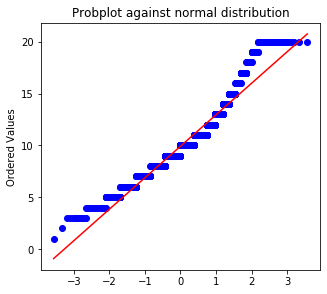

In [9]:
# Normality test for independent variable
fig = plt.figure()
ax1 = fig.add_subplot(211)
prob = stats.probplot(df["Age"], dist=stats.norm, plot=ax1)
ax1.set_xlabel('')
ax1.set_title('Probplot against normal distribution')
plt.savefig('Probplot.png')
plt.show()

<span style="color:Blue"> __Comments:__ The Age variable is normally distributed, as can be seen from the q-q plot.

#### <span style="color:Maroon">Assumption 3: Multicollinearity

In [10]:
corr = X_train.corr()
corr.style.background_gradient(cmap='coolwarm')

,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Sex_F,Sex_I,Sex_M
Length,1.000000,0.986862,0.900662,0.925809,0.899342,0.902619,0.903721,0.318691,-0.542849,0.219487
Diameter,0.986862,1.000000,0.906326,0.925835,0.894852,0.898057,0.910986,0.326306,-0.555723,0.224638
Height,0.900662,0.906326,1.000000,0.888821,0.838545,0.866462,0.890950,0.321012,-0.549472,0.223683
Weight,0.925809,0.925835,0.888821,1.000000,0.969003,0.966725,0.957555,0.310440,-0.554304,0.238621
Shucked Weight,0.899342,0.894852,0.838545,0.969003,1.000000,0.932886,0.887944,0.280037,-0.517003,0.231775
Viscera Weight,0.902619,0.898057,0.866462,0.966725,0.932886,1.000000,0.911077,0.314342,-0.553332,0.233897
Shell Weight,0.903721,0.910986,0.890950,0.957555,0.887944,0.911077,1.000000,0.314510,-0.547465,0.228027
Sex_F,0.318691,0.326306,0.321012,0.310440,0.280037,0.314342,0.314510,1.000000,-0.469252,-0.511865
Sex_I,-0.542849,-0.555723,-0.549472,-0.554304,-0.517003,-0.553332,-0.547465,-0.469252,1.000000,-0.518416
Sex_M,0.219487,0.224638,0.223683,0.238621,0.231775,0.233897,0.228027,-0.511865,-0.518416,1.000000


<span style="color:Blue">__Comments:__ Variable: Length, Diameter, Height, Weight, Shucked Weight, Viscera Weight, and Shell Weight are highly correlated with one another. To reduce, the correlation, we shall do a Principle Component Analysis and use Principle Components as the model variables (instead of these raw variables). This will reduce the multicollinearity issue and the estimates of the regression will be stable.

In [11]:
# Import libraries for PCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [12]:
vars1 = ["Length", "Diameter", "Height", "Weight", "Shucked Weight", "Viscera Weight", "Shell Weight"]
vars2 = ["Sex_F", "Sex_M", "Sex_I"]
X_train_sub1 = X_train[vars1]
X_test_sub1 = X_test[vars1]
X_train_sub2 = X_train[vars2]
X_test_sub2 = X_test[vars2]

In [13]:
# Apply standard scaler (on vars1 only)
StdSclr = StandardScaler().fit(X_train_sub1)
X_train_ss1 = StdSclr.transform(X_train_sub1)
X_test_ss1 = StdSclr.transform(X_test_sub1)

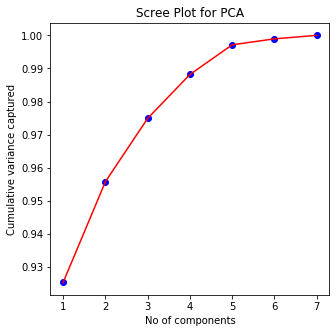

In [14]:
# Scree plot for PCA
pca = PCA()
pcafit = pca.fit(X_train_ss1)
plt.rcParams['figure.figsize'] = [5, 5]
variance_explained = pca.explained_variance_ratio_
cum_variance_explained = variance_explained.cumsum()
no_of_components = np.arange(1,len(cum_variance_explained)+1)
plt.plot(no_of_components, cum_variance_explained, 'bo')
plt.plot(no_of_components, cum_variance_explained, 'r-')
plt.xlabel("No of components")
plt.ylabel("Cumulative variance captured")
plt.title("Scree Plot for PCA")
plt.savefig("PCA_Screeplot.png")
plt.show()

<span style="color:Blue">__Comment:__ From scree plot, we can see that first two components capture >95% of the variance in data

In [15]:
# Lets calculate the correlation of the independent variables wrt age
variables = list(X_train.columns)
corr = [None]*len(variables)
df = X_train.copy()
df["Age"] = y_train

for i in range(0, len(variables)):
    corr[i] = df["Age"].corr(df[variables[i]])

Correlation = pd.DataFrame(variables)
Correlation.columns = ["Variables"]
Correlation["Correlation"] = corr
Correlation = Correlation.sort_values("Correlation", ascending=False)
Correlation

,Variables,Correlation
6,Shell Weight,0.633198
2,Height,0.623482
1,Diameter,0.590696
0,Length,0.573912
3,Weight,0.549097
5,Viscera Weight,0.514044
4,Shucked Weight,0.431586
7,Sex_F,0.257494
9,Sex_M,0.193531
8,Sex_I,-0.455251


In [16]:
# Based on Correlation, "Shell Weight", and "Sex_F", "Sex_M", "Sex_I" will be used in the model
vars1 = ["Shell Weight", "Sex_F", "Sex_M"]
X_train_lr = X_train[vars1]
X_test_lr = X_test[vars1]

In [17]:
def evaluate(model, X, y_act, data_str):
    y_pred = model.predict(X)
    MAE = metrics.mean_absolute_error(y_act, y_pred)
    MSE = metrics.mean_squared_error(y_act, y_pred)
    r2 = metrics.r2_score(y_act, y_pred)
    print ('Model Performance:{}'.format(data_str))
    print('Mean Absolute Error: {:0.4f}.'.format(MAE))
    print('Mean Square Error = {:0.4f}.'.format(MSE))
    print('Rsquare = {:0.4f}'.format(r2))
    return MAE, MSE, r2

In [18]:
def plot_ActvsPred(model, X, y, sample_name):
    plt.rcParams['figure.figsize'] = [10, 5]
    y_hat = model.predict(X)
    y_hat = pd.DataFrame(y_hat)
    y_hat.columns = ["Predicted"]
    y_hat["Actual"] = y
    obs_np = np.arange(0, len(y))
    y_hat = y_hat.sort_values("Actual", ascending=True)
    plt.plot(obs_np, y_hat["Actual"],'r-', label="Actual Age")
    plt.plot(obs_np, y_hat["Predicted"], 'b-', label="Predicted Age")
    plt.xlabel("observation")
    plt.ylabel("Age")
    plt.title("Actual Vs Predicted plot for {} sample".format(sample_name))
    plt.legend()
    plt.savefig(f'LR_{sample_name}_actual_predicted.png')
    plt.plot()
    return

###### <span style="color:Maroon">Linear Regression with Intercept

In [19]:
# Import the required libraries
import statsmodels.api as sm
x_df = sm.add_constant(X_train_lr)
mod = sm.OLS(y_train, x_df )
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.418
Model:                            OLS   Adj. R-squared:                  0.417
Method:                 Least Squares   F-statistic:                     648.5
Date:                Tue, 13 Apr 2021   Prob (F-statistic):          1.10e-317
Time:                        05:41:33   Log-Likelihood:                -6230.6
No. Observations:                2713   AIC:                         1.247e+04
Df Residuals:                    2709   BIC:                         1.249e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            6.2111      0.097     64.010   

In [20]:
# Predict train datase
print("++++++++++++++++++++++++\n")
X_train_lr1 = sm.add_constant(X_train_lr)
MAE1, MSE1, r21 = evaluate(res, X_train_lr1, y_train,'Train Sample')

# Predict test datase
print("++++++++++++++++++++++++\n")
X_test_lr1 = sm.add_constant(X_test_lr)
MAE1, MSE1, r21 = evaluate(res, X_test_lr1, y_test,'Train Sample')

++++++++++++++++++++++++

Model Performance:Train Sample
Mean Absolute Error: 1.7887.
Mean Square Error = 5.7849.
Rsquare = 0.4180
++++++++++++++++++++++++

Model Performance:Train Sample
Mean Absolute Error: 1.7622.
Mean Square Error = 5.7419.
Rsquare = 0.3825


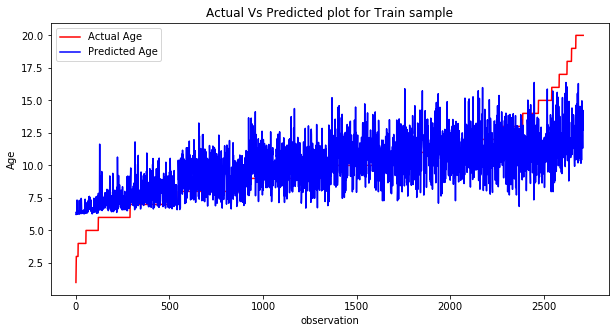

In [21]:
# Plot Actual Versus Predicted for Train Sample
plot_ActvsPred(res, X_train_lr1, y_train, "Train")

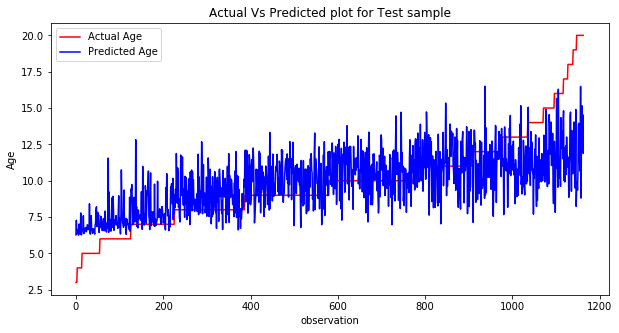

In [22]:
# Plot Actual Versus Predicted for Test Sample
plot_ActvsPred(res, X_test_lr1, y_test, "Test")

<span style="color:Blue">__Comments:__ Linear Regression has a very low Rsquare, and higher MAE and MSE.